In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator
from collections import Counter
import seaborn as sns

In [2]:
%store -r data
%store -r X
%store -r Y
%store -r X_pca

In [5]:
X_pca.shape

(8000, 2)

In [9]:
knn = NearestNeighbors(n_neighbors = 4).fit(X_pca)
neigh_dist, neigh_ind = knn.kneighbors(X_pca)
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

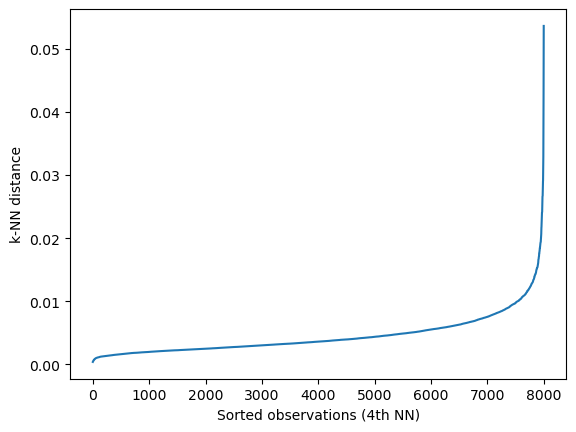

In [12]:
k_dist = sort_neigh_dist[:, 3]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [19]:
knee = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0, 
                      curve = "concave", direction = "increasing", online=True)
print(knee.knee_y)
eps = knee.knee_y

0.019389856165096912


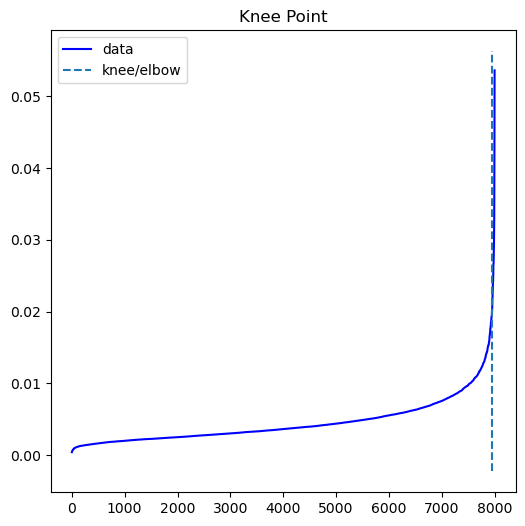

In [18]:
knee.plot_knee()
plt.show()

In [20]:
clusters = DBSCAN(eps = eps, min_samples = 4).fit(X_pca)

In [23]:
print(set(clusters.labels_))
Counter(clusters.labels_) # value of -1 represents noise

{0, 1, -1}


Counter({0: 3133, -1: 23, 1: 4844})

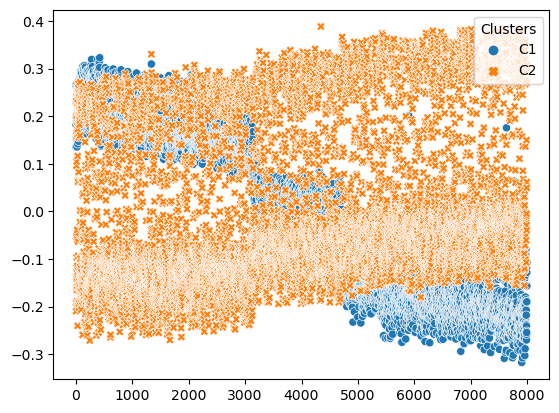

In [31]:
p = sns.scatterplot(data = X_pca)
sns.move_legend(p, "upper right", title = 'Clusters')
plt.show()